In [119]:
import pandas as pd
import logging
import traceback
import re, string
import nltk
from textblob import TextBlob
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [120]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['Abbey','abbey','downton', 'series', 'show', 'season', 'character']
stop_words.extend(newStopWords)
def normalize_document(doc):
    """
    This function is used to clean the text.
    """
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in filtered_tokens]
    # re-create document from filtered and lemmatized tokens
    doc = ' '.join(lemmatized_word)
    return doc

In [121]:
#Load training and Test data
data=pd.read_csv('Data.csv', header=0, delimiter=',')

In [122]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1XKCHZELFYG6D,1608838137,2563255553,"[0, 0]",This is a good DVD to watch when TV networks a...,5.0,Classy show,1394236800,"03 8, 2014"
1,A3MCIAFO37VH14,1608838137,"2-Stage ""2-Stage""","[0, 0]",Are you kidding? Talk about elements. Produc...,5.0,It was okay..,1386201600,"12 5, 2013"
2,AZV9PA8JPVX8Y,1608838137,3marts,"[0, 0]","From the music to the costumes, to the phenome...",5.0,Downton Abbey,1389916800,"01 17, 2014"
3,ATZN0D5WM2XE3,1608838137,"6 in MI ""6 in MI""","[0, 0]","Even with the crushing ending of the season, t...",5.0,The most beautiful show on television - ever,1388361600,"12 30, 2013"
4,A2A2J133G0WQXK,1608838137,"7Turns ""Enlightened Rogue""","[1, 1]",I first started watching this series in March....,5.0,Outstanding series,1365379200,"04 8, 2013"


In [123]:
data.shape

(23706, 9)

In [124]:
data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [131]:
def generate_word_cloud(text=None):
    """
    This function generates word cloud for the given text.
    """
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud")
    return plt.show()

In [132]:
 def sentiment_score(asin_id=None):
    """
    This function outputs the word clouds for positive and negative sentiments, list top 50 frequent positive and 
    negative words (I have hard coded it but we can improve it by defining multiple functions for each 
    functionalities) and sentiment scores.
    
    @param asin_id: it takes input as movie id
    
    """
    review_text = data[data['asin']==str(asin_id)].reviewText
    sentiment_score = []
    sentiment_positive = []
    sentiment_negative = []
    positive_text = []
    negative_text = []
    for items in enumerate(review_text): 
        blob_current = TextBlob(normalize_document(items[1]))
        sentiment_score.append(blob_current.sentiment[0])
        if blob_current.sentiment[0]>=0:
            positive_text.append(normalize_document(items[1]))
        else:
            negative_text.append(normalize_document(items[1]))

    for sentiment in sentiment_score:
        if sentiment>=0:
            sentiment_positive.append(sentiment)
        else:
            sentiment_negative.append(sentiment)

    positive_sentiment_score = len(sentiment_positive)/len(sentiment_score)*100
    negative_sentiment_score = len(sentiment_negative)/len(sentiment_score)*100
    
    neg_text = []
    for txt in negative_text:
        neg_text.append(txt.split())
        
    pos_text = []
    for txt in positive_text:
        pos_text.append(txt.split())
    negative_list = []
    
    for sublist in neg_text:
        for item in sublist:
            negative_list.append(item)
    counter_neg = Counter(negative_list) 
    positive_list = []
    for sublist in pos_text:
        for item in sublist:
            positive_list.append(item)
    counter_pos = Counter(positive_list) 
  
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    most_occur_pos = counter_pos.most_common(50) 
    pos_word_list = [x[0] for x in most_occur_pos]
    
    most_occur_neg = counter_neg.most_common(50) 
    neg_word_list = [x[0] for x in most_occur_neg]
    generate_word_cloud(text=str(positive_text))
    generate_word_cloud(text=str(negative_text))
    return positive_sentiment_score, negative_sentiment_score, pos_word_list, neg_word_list

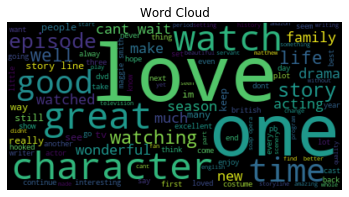

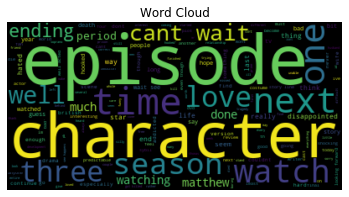

Positive sentiment score is:  93.79108838568298
Negative sentiment score is:  6.20891161431702
Frequent positive words are:  ['love', 'great', 'one', 'character', 'story', 'watch', 'episode', 'time', 'like', 'well', 'watching', 'wait', 'good', 'season', 'cant', 'watched', 'see', 'would', 'life', 'acting', 'next', 'get', 'first', 'really', 'family', 'best', 'line', 'drama', 'wonderful', 'much', 'make', 'keep', 'tv', 'way', 'many', 'im', 'period', 'new', 'two', 'people', 'could', 'forward', 'amazon', 'actor', 'every', 'plot', 'costume', 'interesting', 'hooked', 'even']
Frequent negative words are:  ['like', 'wait', 'next', 'character', 'episode', 'time', 'one', 'watch', 'cant', 'well', 'get', 'love', 'see', 'story', 'season', 'done', 'three', 'bad', 'watching', 'ending', 'though', 'hooked', 'matthew', 'much', 'life', 'period', 'disappointed', 'really', 'thing', 'way', 'think', 'hated', 'star', 'end', 'tv', 'u', 'last', 'long', 'bit', 'go', 'say', 'watched', 'line', 'hope', 'enough', 'als

In [133]:
sentiment_scores = sentiment_score(asin_id=1608838137)
print("Positive sentiment score is: ", sentiment_scores[0])
print("Negative sentiment score is: ", sentiment_scores[1])
print("Frequent positive words are: ", sentiment_scores[2])
print("Frequent negative words are: ", sentiment_scores[3])

***Conclusion*** I have tried to incorporate with the requirements with this basic sentiment analysis model. Though there are still minor flaws which could be rectified.